## Исследование данных о российском кинопрокате



**Описание проекта анализа рынка российского кинопроката**

**Заказчик проекта**:
Министерство культуры Российской Федерации.

**Цель проекта**:
Исследование рынка российского кинопроката с целью выявления текущих трендов, с особым вниманием к фильмам, получившим государственную поддержку. Основная задача - оценить интерес зрителя к таким фильмам.

**Исходные данные для анализа**:
Для выполнения проекта предоставлены данные, опубликованные на портале открытых данных Министерства культуры. Набор данных включает в себя информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также данные с сайта КиноПоиск.

**Этапы выполнения проекта**:

1. **Подготовка данных:**
   - Объединение файлов с данными в один датафрейм, обеспечивая включение всех объектов из датасета mkrf_movies.
   - Проверка типов данных и их преобразование при необходимости.
   - Анализ и обработка пропусков в данных.
   - Поиск и обработка дубликатов.
   - Корректировка категориальных и количественных значений, включая исправление проблемных значений и обработку подозрительных данных.
   - Добавление новых столбцов с информацией о годе проката, именем и фамилией главного режиссёра, основным жанром фильма и долей государственной поддержки от общего бюджета фильма.

2. **Исследовательский анализ данных:**
   - Анализ количества фильмов, выходивших в прокат каждый год, и доли фильмов с указанной информацией о прокате.
   - Изучение динамики проката по годам, включая анализ минимальных и максимальных сумм сборов.
   - Сравнение средних и медианных сумм сборов по годам.
   - Оценка влияния возрастного ограничения на сборы фильма в прокате.

3. **Анализ фильмов с государственной поддержкой:**
   - Исследование объемов государственной поддержки и окупаемости таких фильмов.
   - Анализ рейтинга фильмов с государственной поддержкой.

**Общий вывод**:
В ходе проекта будет проведен комплексный анализ рынка российского кинопроката с акцентом на фильмы, получившие государственную поддержку. Основываясь на данных о прокатных удостоверениях, сборах, государственной поддержке и рейтингах с КиноПоиска, будут выявлены ключевые тренды и предпочтения зрителей. Результаты исследования помогут заказчику - Министерству культуры Российской Федерации - в формировании стратегии развития отечественного кинематографа и распределении средств государственной поддержки.

### Шаг 1. Открытие файлов с данными и объединение их в один датафрейм.

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
data_movies = pd.read_csv('mkrf_movies.csv', parse_dates=['show_start_date'])
data_shows = pd.read_csv('mkrf_shows.csv')

Выведем общую информацию о каждом датафрейме, чтобы понять, по какому столбцу стоить объединять их.

In [4]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [5]:
data_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [6]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
data_shows.head(10)

,puNumber,box_office
0,111000113,2450
1,111000115,61040
2,111000116,153030013
3,111000117,12260956
4,111000118,163684058
5,111000119,4293650
6,111000212,200
7,111000216,355567
8,111000313,710
9,111000314,1607970


Как мы видим, столбец `puNumber` есть в обоих датафреймах, но типы данных в них разные - строка и целое число.

In [8]:
data_movies['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [9]:
data_shows['puNumber'] = data_shows['puNumber'].astype(str)

In [10]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Заметим, что значение рейтинга является строковым значением, а не числовым. Исправим это.
Сначала узнаем, какие значения лежат в датасете

In [11]:
data_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Конвертировать ratings в числа, преобразовав проценты в десятибалльную шкалу.

In [12]:
def convert_rating(rating):
    if isinstance(rating, str):
        if '%' in rating:
            return float(rating.replace('%', '')) / 10
    return rating

data_movies['ratings'] = data_movies['ratings'].apply(convert_rating).astype(float)
print(data_movies['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


Объединим датафреймы по этому столбцу:

In [13]:
data = pd.merge(data_movies, data_shows, on='puNumber', how='left')
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",2700
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",NaN


## Промежуточный вывод

В этом шаге были выполнены следующие действия:

1. **Объединены данные:**
    - Объединили два датафрейма `data_movies` и `data_shows` с помощью функции `pd.merge`.Объединили по столбцу `puNumber`, который присутствовал в обоих датафреймах.
    - Тип данных в столбце `puNumber` был изменен с целого числа на строку в датафрейме `data_shows`, а столбец `ratings` был переведен в числовой тип, преобразовав проценты в десятибалльную шкалу.
    - В результате получилось 7486 строк и 16 столбцов в объединенном датафрейме `data`.
2. **Изучены данные:**
    - Вывели информацию о столбцах датафреймов `data_movies` и `data_shows` с помощью функции `info`.
    - Это помогло нам понять, по какому столбцу стоит объединять датафреймы, и какой тип данных имеет каждый столбец.

### Шаг 2. Предобработка данных

### Шаг 2.1. Проверьте типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме


Выведем количество пропусков в каждом столбце и долю от общего датасета

In [15]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Пропуски': missing_values, 'Доля (%)': missing_percentage})
print(missing_info[missing_info['Пропуски'] > 0])

                       Пропуски  Доля (%)
film_studio                  18         0
production_country            2         0
director                      9         0
producer                    568         8
refundable_support         7154        96
nonrefundable_support      7154        96
budget                     7154        96
financing_source           7154        96
ratings                     967        13
genres                      976        13
box_office                 4328        58


### 2.2.1 Студия-производитель `film_studio`

В столбце `film_studio` всего 0.2% пропусков. Это достаточно маленькое значение, а значит, правильным решением будет удалить эти строки из датафрейма. То же самое ждет и столбец `director` и `production_country` - там пропусков еще меньше.

Пару слов о том, как могли возникнуть пропуски в этих столбцах. Скорее всего, данные просто не были добавлены в датасет, так как обычно режиссер и студия-производитель есть у любого фильма. С достаточно большим шансом мы можем сказать, что виноват человеческий фактор.

In [16]:
data = data.dropna(subset=['film_studio', 'director', 'production_country' ]).reset_index(drop=True)


In [17]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Пропуски': missing_values, 'Доля (%)': missing_percentage})
print(missing_info[missing_info['Пропуски'] > 0])

                       Пропуски  Доля (%)
producer                    564         8
refundable_support         7127        96
nonrefundable_support      7127        96
budget                     7127        96
financing_source           7127        96
ratings                     948        13
genres                      957        13
box_office                 4304        58


### 2.2.2 Продюсер `producer`

Приличный процент значений в столбце с продюсером отсутствует. С чем это может быть связано? Посмотрим на эти данные:

In [18]:
data_prod_nan = data.query('producer.isna() == True')
data_prod_nan.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",2700
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"боевик,драма,приключения",NaN


Что объединяет все эти данные? Предположительно, они были сняты во времена СССР, либо же имеют достаточно много стран производства. Убедимся в этом.

In [19]:
data_prod_nan['production_country'].unique()

array(['СССР', 'СССР, Венгрия', 'Чехословакия', 'США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия',
       'Франция - Италия - Великобритания - США', 'Чехия',
       'СССР, Финляндия', 'Великобритания - США', 'Япония',
       'СССР, Польша', 'СССР - Швейцария - Франция', 'Франция',
       'Великобритания', 'Австралия', 'Италия', 'Украина',
       'Франция-Бельгия', 'Мексика - Франция',
       'Великобритания - Германия', 'Россия', 'Иран',
       'Республика Узбекистан', 'Бразилия', 'Италия ', 'Франция - Россия',
       'Индонезия', 'СССР, ФРГ, Западный Берлин',
       'США - Канада - Афганистан - Бельгия - Франция',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Бельгия - Испания - Канада - Нидерланды',
       'СССР, Венгрия, ЧССР, ГДР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ',
       ' СССР   ', 'СССР     ', 'Индия - Мексика', 'СССР    ', ' С

Да, так и есть. В данном случае, никак заполнить пропуски мы не можем, ровно как и удалить строки из исходного датафрейма - потерям почти 8% данных.

Скорее всего, это связано с тем, что в Союзе продюсером чаще всего выступало государство или сама киностудия. А если кино снимало сразу несколько государств, то одного продюсера обычно и нет. Следовательно, эти данные не нуждаются в заполнении.

### 2.2.3 Государственная поддержка (`refundable_support`, `nonrefundable_support`, `budget`, `financing_source`)

Следующие несколько столбцов связаны с государственной поддержкой кино. Взглянем на эти данные:

In [20]:
data.query('budget.isna() == False').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1280,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8,"драма,мелодрама",365354
1446,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,NaN,28140
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5,"комедия,фантастика",19957032
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4,драма,55918
1789,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6,драма,232100
1851,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0,25000000,51850000,Министерство культуры,6,"мультфильм,фэнтези,история",15078859
1867,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000,100000000,220588394,Фонд кино,8,"драма,военный,история",249166768
1868,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0,46502299,86210067,"Министерство культуры, Фонд кино",7,драма,4731240
1900,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0,75000000,139551503,Фонд кино,7,"триллер,боевик,приключения",352804320
1909,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0,34000000,48571430,Министерство культуры,7,"фэнтези,приключения,драма",51908


Да, действительно все эти фильмы сняты в России. В таком случае эти столбцы мы снова трогать не будем - они будут отдельно изучены во время проведения исследовательского анализа данных.

Причина пропуска в данных - данные только для фильмов с господдержкой.

### 2.2.4 Рейтинг и жанры (`ratings`, `genres`)

In [21]:
data.query('ratings.isna() == True').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карел...,224010714,2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Каких-то закономерностей не наблюдается. Вероятно, значения были потеряны при создании исходных датасетов. Кстати, это же произошло со столбцом `genres`.

Правильным решением в данном случае будет заполнить пропуски медианным значением рейтинга.

In [22]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [23]:
data['ratings'] = data['ratings'].fillna(data['ratings'].median())

Названия жанра так же заполнить не получится, так что придется оставить их пустыми.

In [24]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Пропуски': missing_values, 'Доля (%)': missing_percentage})
print(missing_info[missing_info['Пропуски'] > 0])

                       Пропуски  Доля (%)
producer                    564         8
refundable_support         7127        96
nonrefundable_support      7127        96
budget                     7127        96
financing_source           7127        96
genres                      957        13
box_office                 4304        58


### 2.2.5 Сборы `box_office`

Большой процент пропусков в столбце со сборами связан с тем, что многие фильмы не были в прокате в России (не имели прокатного удостоверения в списке `mkrf_shows`.

Заполнить пропуски нельзя - сборы конкретное значение для каждого фильма.

### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

Проверим наличие явных пропусков:

In [25]:
data.duplicated().unique()

array([False])

Явные дубликаты отсутствуют, теперь рассмотрим важные столбцы. К примеру, `title` - название. Также стоит изучать столбец с прокатными удостоверениями. Остальные столбцы нет смысла рассматривать, так как режиссеры, продюсеры, страны и т.п. могут повторяться и в данном случае являются некоторыми идентификаторами, хоть и являются дубликатами с точки зрения анализа данных.

In [26]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный",759526
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"фэнтези,приключения,семейный",1125302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7342,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,детектив,криминал",NaN
7389,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"комедия,приключения,детектив",NaN
7411,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6,"триллер,драма",175004
7423,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"триллер,криминал,детектив",NaN


Чтобы данные при анализе не оказались искажены, придется удалить строки, где названия повторяются.

Какая причина может быть у таких пропусков? Мы видим, что у фильмов с одинаковым названием отличается номер прокатного удостоверения и дата выхода. Как так? Разные даты выхода? Да, очень часто фильмы выходят в прокат несколько раз в течение какого-то срока. Это не было учтено при формировании датасета, поэтому и появились вот такие дубликаты. То же самое и с прокатным удостоверением - оно тоже обновляется.

In [27]:
data = data.drop_duplicates(subset='title', keep='first').reset_index(drop=True)

In [28]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [29]:
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


### Шаг 2.4. Изучим категориальные значения


##### Исправляем тип фильма

In [30]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [31]:
data['type'] = data['type'].str.strip()

In [32]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Приведем столбец `age_restriction` в нормальный вид

In [33]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [34]:
data['age_restriction'] = data['age_restriction'].replace({'«0+» - для любой зрительской аудитории' : '«0+»', '«6+» - для детей старше 6 лет' : '«6+»', '«12+» - для детей старше 12 лет' : '«12+»', '«16+» - для детей старше 16 лет' : '«16+»', '«18+» - запрещено для детей' : '«18+»'})

In [35]:
data['age_restriction'].unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

### 2.4.1 Что общего у категориальных значений?

Как минимум, данные в некоторых столбцах по-разному. Например, в столбце `production_country` часть значений через запятую, а другая - через тире. Это нужно исправить, ведь существует вероятность, что один и тот же набор стран будет учтен несколько раз.

In [36]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [37]:
data['production_country'] = data['production_country'].str.replace(' - ', ', ').str.replace('-', ', ').str.replace('Сша', 'США')
data = data[data['production_country'] != '2019'].reset_index(drop=True)

In [38]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [39]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [40]:
data['genres'] = data['genres'].str.replace(',', ', ')

data['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', nan,
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, комедия, кр

### Шаг 2.5. Проверим количественные значения


In [41]:
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,329,329,329,6745,3014
mean,11653495,48059843,125146705,6,75707669
std,24540030,57011893,183916186,1,237807403
min,0,0,0,1,0
25%,0,25000000,42000000,6,117075
50%,0,30000000,68490606,7,2435268
75%,15000000,40000000,140025000,7,23755074
max,180000000,400000000,2305074303,10,3073568691


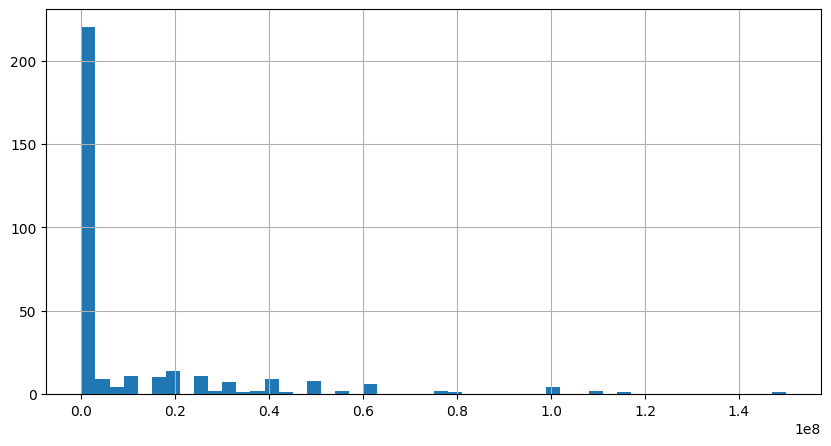

In [42]:
data['refundable_support'].hist(bins=50, range=(0, 150_000_000), figsize=(10, 5));

Взглянув на график мы сразу видим, что более двухсот фильмов имеют 0 в графе обязательных для возврата средств государственной поддержки.

Встречаются и выбросы - 150 млн.

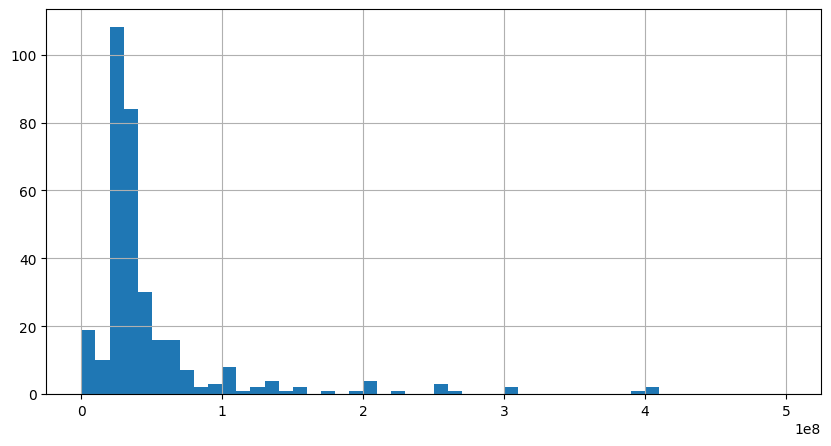

In [43]:
data['nonrefundable_support'].hist(bins=50, range=(0, 500_000_000), figsize=(10, 5));


Порядка 110 фильмов получили безвозмездную государственную поддержку в размере от 20 до 30 млн рублей. Далее - от 30 до 40 млн гос.поддержки получили более 80 фильмов.

Выбросы так же присутствуют, но это снова не критично.

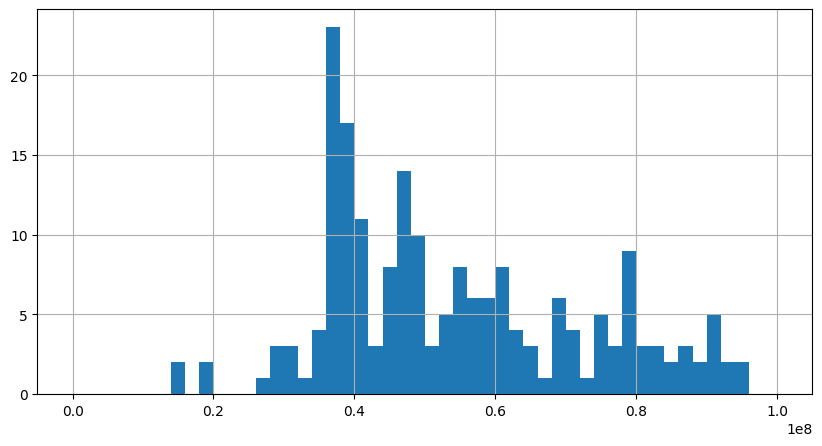

In [44]:
data['budget'].hist(bins=50, range=(1, 100_000_000), figsize=(10, 5));

Более 25 фильмов имеют бюджет примерно 40 миллионов. А почти 15 фильмов имеют бюджет почти 50 миллионов.

In [45]:
filtered_data = data[(data['budget'] >= 1) & (data['budget'] <= 100_000_000)]
print(filtered_data[['budget']].count())


budget    196
dtype: int64


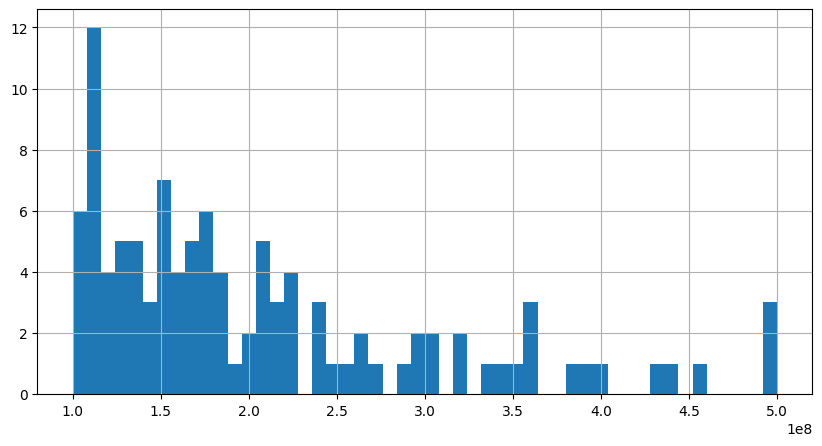

In [46]:
data['budget'].hist(bins=50, range=(100_000_000, 500_000_000), figsize=(10, 5));

In [47]:
filtered_data = data[(data['budget'] >= 100_000_00) & (data['budget'] <= 500_000_000)]
print(filtered_data[['budget']].count())


budget    302
dtype: int64


Фильмов с бюджетом от 100 до 500 миллионов больше, чем фильмов до 100 миллионов. Около 12 фильмов имеют бюджет почти 120 миллионов.

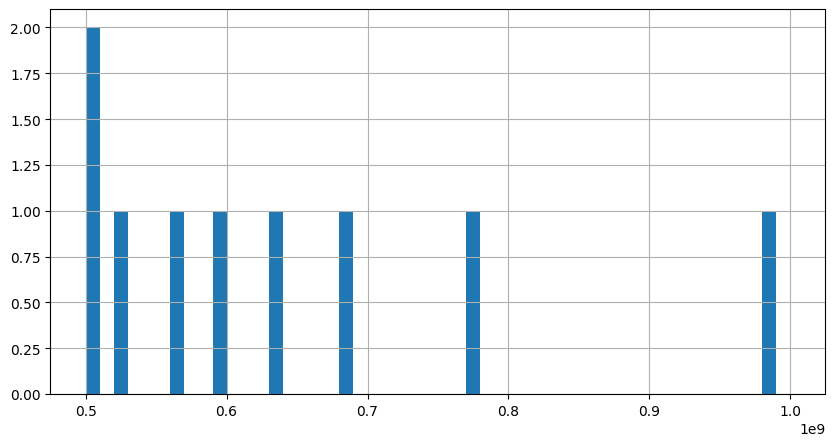

In [48]:
data['budget'].hist(bins=50, range=(500_000_000, 1_000_000_000), figsize=(10, 5));

In [49]:
filtered_data = data[(data['budget'] >= 500_000_00) & (data['budget'] <= 1_000_000_000)]
print(filtered_data[['budget']].count())


budget    212
dtype: int64


Фильмов от 500 миллионов до 1 миллиарда немного больше, чем фильмов до 100 миллионов, но меньше, чем фильмов от 100 до 500 миллионов.

In [50]:
data.query('budget > 1_000_000_000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4769,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+»,110000000,190000000,1032905957,Фонд кино,8,"фэнтези, комедия, семейный",511775548
6393,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+»,180000000,90000000,2305074303,Фонд кино,6,"приключения, фэнтези",333597060


Фильмов с бюджетом более 1 млрд всего 2. Не будем их удалять, т.к. это не случайный выброс.

### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [51]:
data['year_of_show'] = data['show_start_date'].dt.year
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+»,NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+»,NaN,NaN,NaN,NaN,8,драма,NaN,2016
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+»,NaN,NaN,NaN,NaN,8,"мелодрама, комедия",2700,2013


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [52]:
def get_main(value):
    if isinstance(value, str):
        return value.split(',')[0].strip()
    return value

data['main_director'] = data['director'].apply(get_main)
data['main_genre'] = data['genres'].apply(get_main)

data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,NaN,7,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+»,NaN,NaN,NaN,NaN,7,"драма, военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,NaN,7,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+»,NaN,NaN,NaN,NaN,8,драма,NaN,2016,В.Абдрашитов,драма
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+»,NaN,NaN,NaN,NaN,8,"мелодрама, комедия",2700,2013,В.Меньшов,мелодрама


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
def support(row):
    refundable = row['refundable_support']
    nonrefundable = row['nonrefundable_support']
    budget = row['budget']

    all_support = refundable + nonrefundable
    if budget == 0:
        return None
    else:
        return (all_support / budget) * 100

data['support_percent'] = data.apply(support, axis=1)
data.query('budget > 1')


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show,main_director,main_genre,support_percent
1164,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0,26500000,79411900,Министерство культуры,8,"драма, мелодрама",365354,2013,А.Атанесян,драма,33
1314,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0,26000000,37142857,Министерство культуры,7,NaN,28140,2014,А.Якимчук,NaN,70
1359,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0,107847945,176023490,Фонд кино,5,"комедия, фантастика",19957032,2013,Р.Давлетьяров,комедия,61
1382,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0,28000000,40574140,Министерство культуры,4,драма,55918,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69
1626,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0,25000000,40015122,Министерство культуры,6,драма,232100,2014,М.Угаров,драма,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+»,25000000,35000000,160000000,Фонд кино,7,комедия,3073568691,2019,К.Шипенко,комедия,38
6724,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,100000000,400000000,980000000,Фонд кино,6,"история, биография, драма",717703186,2019,А.Кравчук,история,51
6726,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+»,100000000,0,190000000,Фонд кино,7,"мультфильм, приключения, семейный",501069235,2019,Д.Шмидт,мультфильм,53
6735,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+»,0,30000000,46154000,Министерство культуры,6,драма,NaN,2019,И.Северов,драма,65


#### Промежуточный вывод

На этом этапе удалось подготовить датасет для дальнейшего анализа. Перечислим все проделанные шаги:

**1. Проверка типов данных:**

* Обнаружены объекты разных типов данных, такие как строки, целые числа, даты, числа с плавающей точкой.
* Типы данных в датафрейме не требуют приведения к общему типу.

**2. Изучение пропусков:**

* Большинство пропусков присутствует в столбцах:
    * `film_studio`
    * `producer`
    * `refundable_support`
    * `nonrefundable_support`
    * `budget`
    * `financing_source`
    * `ratings`
    * `genres`
    * `box_office`
* Причины пропусков:
    * Отсутствие данных в исходном датасете.
    * Особенности организации кинопроизводства.
    * Документальные фильмы, которые не показывают в кинотеатрах.
    * Фильмы, не имеющие прокатного удостоверения в списке mkrf_shows.
* Обработка пропусков:
    * Удалены строки с пропусками в `film_studio` и `director`.
    * Значения в `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` оставлены для исследования государственной поддержки.
    * Пропуски в `ratings` заполнены медианным значением.
    * Пропуски в `genres` оставлены пустыми.
    * Пропуски в `box_office` оставлены как есть.

**3. Удаление дубликатов:**

* Обнаружены дубликаты строк, отличающиеся только датой выхода и номером прокатного удостоверения.
* Дубликаты удалены.

**4. Изучение категориальных значений:**

* Обнаружены проблемы с форматированием данных в некоторых столбцах.
* Проблемы исправлены.

**5. Проверка количественных значений:**

* Обнаружены выбросы в столбцах:
    * `refundable_support` (значения ~200 млн рублей)
    * `nonrefundable_support` (значения ~100 млн рублей)
    * `budget` (значения ~2 млрд рублей)
    * `box_office` (значения ~3 млрд рублей)
* Выбросы не устранены, так как не оказывают критического влияния на анализ.

**6. Добавление новых столбцов:**

* Созданы столбцы:
    * `year_of_show` - год проката фильма
    * `main_director` - имя главного режиссёра
    * `main_genre` - основной жанр фильма
    * `support_percent` - доля государственной поддержки в бюджете фильма

### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

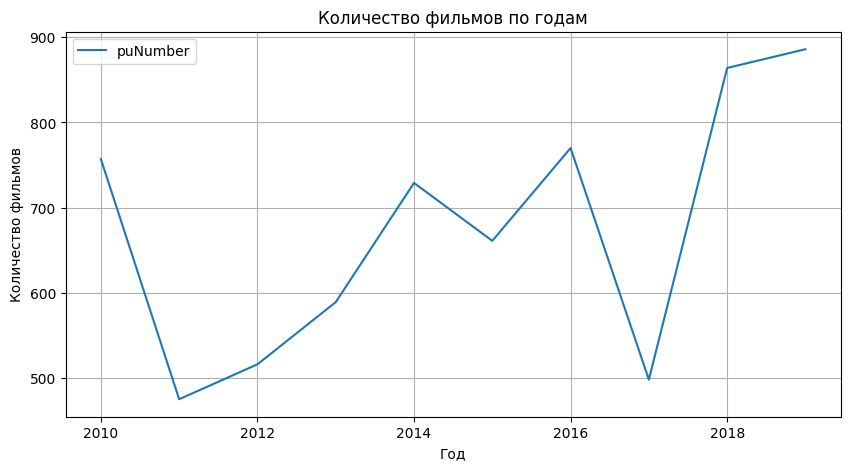

In [54]:
year_of_show_plot = (data.pivot_table(index='year_of_show', values='puNumber', aggfunc='count')
                     .plot(kind='line', figsize=(10, 5), grid=True))

year_of_show_plot.set_title('Количество фильмов по годам')
year_of_show_plot.set_xlabel('Год')
year_of_show_plot.set_ylabel('Количество фильмов')

plt.show()

Это общая информация о фильмах за каждый год. Больше всего фильмов, которые вышли в 2019 году, что позволяет сделать предположение о том, что это наиболее полно представлен в датасете. Меньше всего фильмов вышло в 2011 году.

Теперь посмотрим на такую же статистику по фильмам, которые выходили в прокат в кинотеатрах:

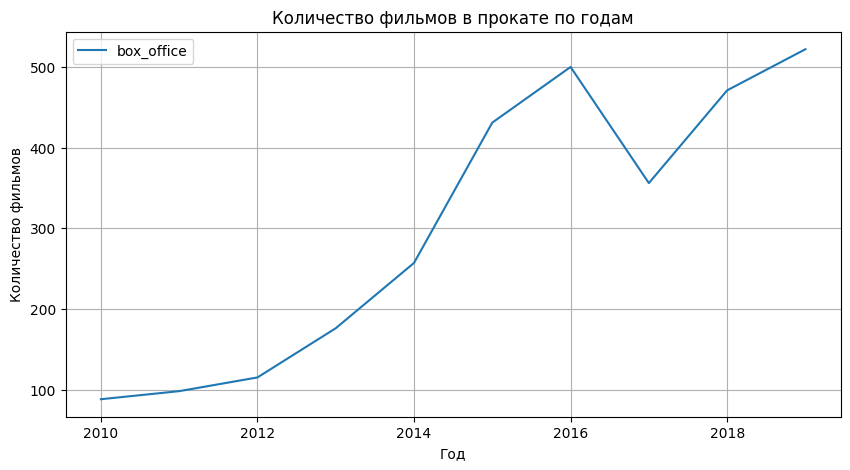

In [55]:
year_of_show_plot = (data.pivot_table(index='year_of_show', values='box_office', aggfunc='count')
                     .plot(kind='line', figsize=(10, 5), grid=True))

year_of_show_plot.set_title('Количество фильмов в прокате по годам')
year_of_show_plot.set_xlabel('Год')
year_of_show_plot.set_ylabel('Количество фильмов')

plt.show()

2016 и 2018 практически равны по количеству фильмов, вышедших в кинотеатрах. Но тем не менее, в 2019 фильмов снова вышло больше. А в 2010 меньше всего. Осталось посчитать долю фильмов, вышедших в прокат относительно всех вышедших фильмов.

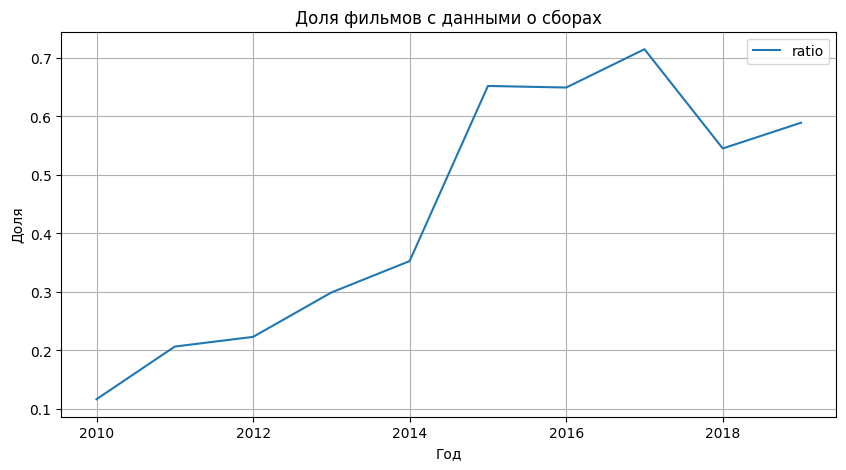

In [56]:
percentage_by_year = data.pivot_table(index='year_of_show', values=['box_office', 'puNumber'], aggfunc='count').reset_index()
percentage_by_year['ratio'] = percentage_by_year['box_office'] / percentage_by_year['puNumber']

percentage_by_year.plot(x='year_of_show', y='ratio', figsize=(10, 5), kind = 'line', grid = True)
plt.title('Доля фильмов с данными о сборах')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.show()

Как мы видим, самое большое отношение наблюдается в 2017 году. Значит, мы можем сделать вывод о том, довольно значительная часть фильмов, которые вышли в этом году также были в прокате в российских кинотеатрах.

С точки зрения фильмов в прокате самый полным является также 2019, но дальше за ним следуют 2016 и 2018 годы с небольшим отрывом.

Особенно интересным является 2016, так как именно в этом году процент фильмов, которые вышли в прокат выше, чем в остальные годы, представленные в датасете.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Динамика проката по количеству фильмов представлена в предыдущем пункте.

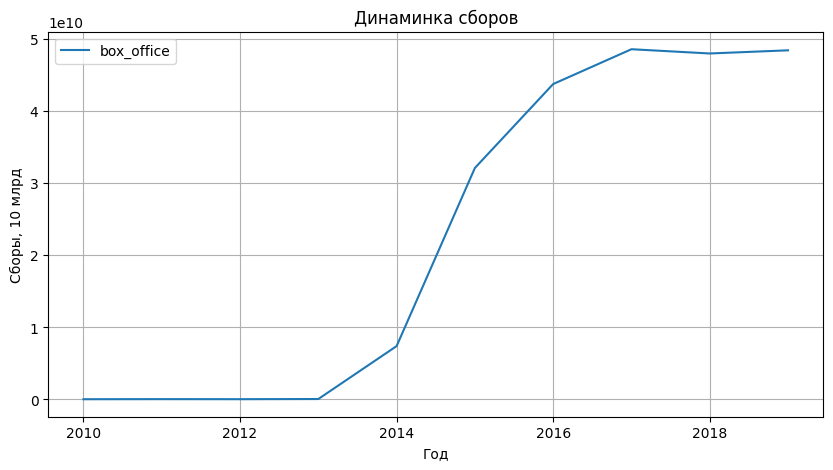

In [57]:
box_office_plot = (data.pivot_table(index='year_of_show', values='box_office', aggfunc='sum')
                   .plot(kind='line', figsize=(10, 5), grid=True))

box_office_plot.set_title('Динаминка сборов')
box_office_plot.set_xlabel('Год')
box_office_plot.set_ylabel('Сборы, 10 млрд')

plt.show()

Судя по графику,в датасете отсутствуют данные о сборах за 2010-2013 годы.

Поэтому наименьшее значение суммы сборов наблюдается в 2014 году - менее 10 миллиардов.
Зато видна корреляция с количеством фильмов - чем больше кино, тем больше сборы.

Наибольшие сборы зафиксированы в 2017 году, наравне с ним и следующие два года - 2018 и 2019. В эти годы выручка составила порядка 48-49 миллиардов.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

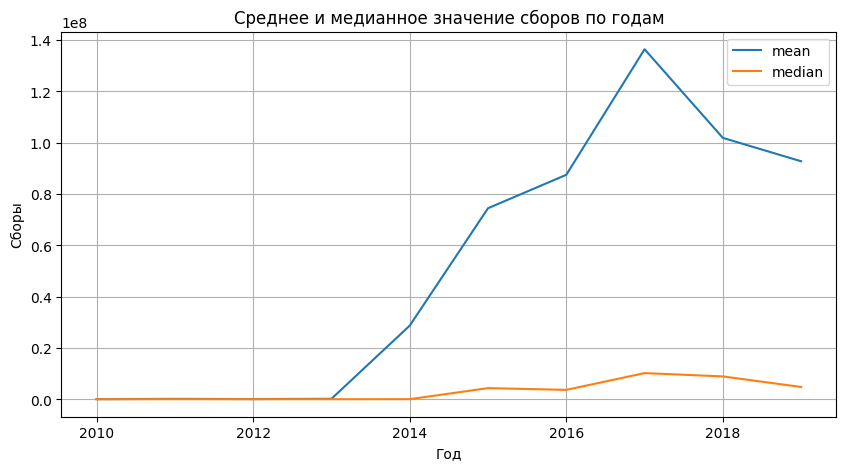

In [58]:
box_office_info = data.pivot_table(index='year_of_show', values='box_office', aggfunc=['mean', 'median']).reset_index()
box_office_info.columns = ['year_of_show', 'mean', 'median']

box_office_plot = box_office_info.plot(x='year_of_show', y=['mean', 'median'], kind='line', figsize=(10, 5), grid=True)
box_office_plot.set_title('Среднее и медианное значение сборов по годам')
box_office_plot.set_xlabel('Год')
box_office_plot.set_ylabel('Сборы')

plt.show()

И снова сборы появляются только после 2013 года. Тем не менее, мы видим, что медиана сильно меньше среднего - это говорит о том, что многие фильмы собирают очень мало, искажая данные.

Тем не менее, мы снова видим, что 2017 год был самым успешным с точки зрения сборов - в среднем около 137 млн.

Как мы можем заметить, действительно есть фильмы-гиганты, которые собирают огромные суммы. Они действительно завышают значение среднего, ибо бОльшая часть фильмов не собрала и миллионав в прокате. В то же время, такие фильмы (с низкими сборами) занижают значение медианы.

In [59]:
data['box_office'].describe()

,box_office
count,3014
mean,75707669
std,237807403
min,0
25%,117075
50%,2435268
75%,23755074
max,3073568691


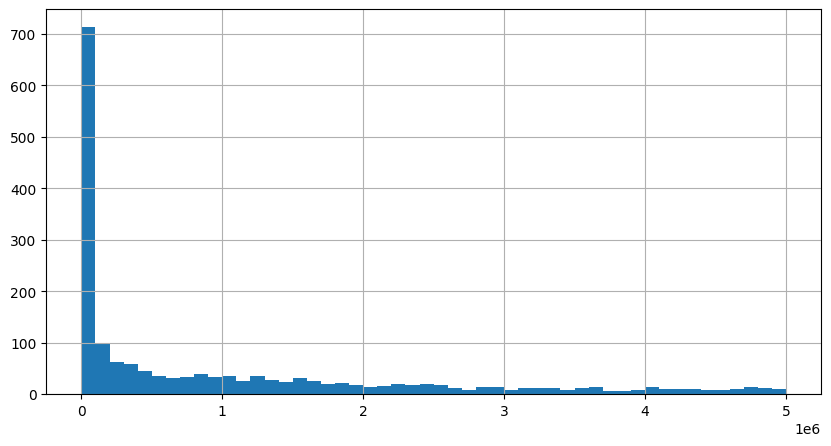

In [60]:
data['box_office'].hist(bins=50, range=(1, 5_000_000), figsize=(10, 5));

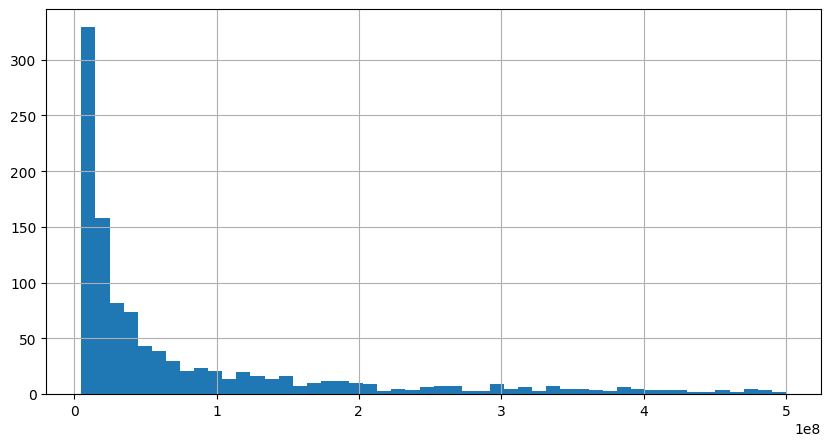

In [61]:
data['box_office'].hist(bins=50, range=(5_000_000, 500_000_000), figsize=(10, 5));

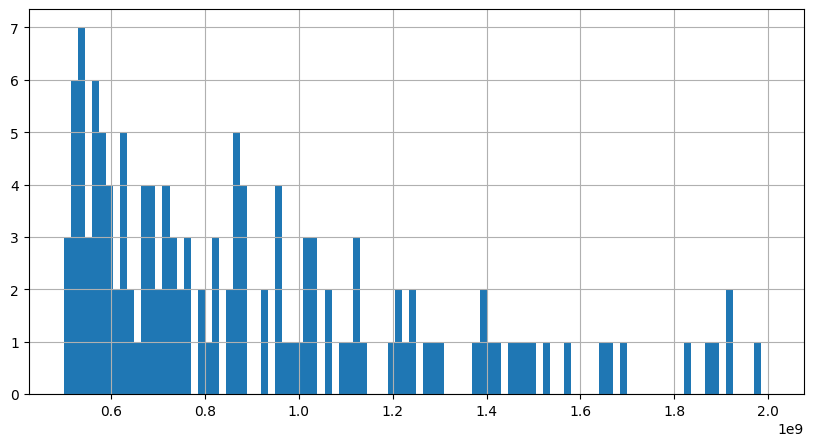

In [62]:
data['box_office'].hist(bins=100, range=(500_000_000, 2_000_000_000), figsize=(10, 5));

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

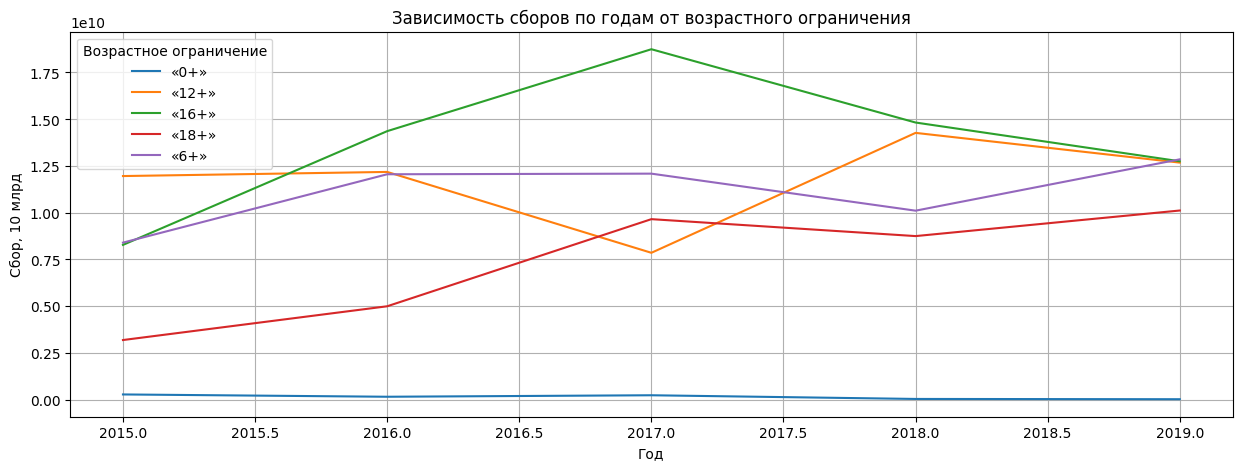

In [63]:
data_age = (data.query('2015 <= year_of_show <= 2019').pivot_table(
    index='year_of_show',
    columns='age_restriction',
    values='box_office',
    aggfunc='sum'
).reset_index())

plt.figure(figsize=(15, 5))
for age_restriction in data_age.columns[1:]:
    plt.plot(data_age['year_of_show'], data_age[age_restriction], label=age_restriction)

plt.title('Зависимость сборов по годам от возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Сбор, 10 млрд')
plt.grid(True)
plt.legend(title='Возрастное ограничение')
plt.show()

In [64]:
data_age_totals = data.query('2015 <= year_of_show <= 2019').pivot_table(
    index='age_restriction',
    values='box_office',
    aggfunc='sum'
).reset_index()

data_age_totals.columns = ['Возрастное ограничение', 'Сумма сборов, руб.']
print(data_age_totals)

  Возрастное ограничение  Сумма сборов, руб.
0                   «0+»           703150788
1                  «12+»         58930789426
2                  «16+»         68945957729
3                  «18+»         36685388798
4                   «6+»         55492520204


2015: почти 12 миллиардов собрали фильмы с возрастным ограничением 12+.

2016: 14 миллиардов принесли фильмы с цензом 16+.

2017: практически 19 миллиардов снова уходят на баланс фильмов для подростков (16+).

2018: 15 миллиардов опять принесли 16+.

2019: с небольшим отрывом от 12+, фильмы с цензом 16+ принесли 12.7 миллиардов.


Исходя из изученных данных, можно сделать вывод, что больше всего приносят фильмы для подростков (12-18 лет).
Больше всего за данный промежуток времени принесли 16+ - более 68 миллиардов рублей.

В целом, от года к году картина не меняется, но есть интересные изменения: объем сборов фильмов 18+ с каждым годом немного увеличивается, ровно как и 6+. \
С чем это может быть связано? Скорее всего, с количеством фильмов, которое выходит каждый следующий год - оно увеличивается. Соответственно, увеличиваются и сборы.

Исследование динамики выхода фильмов в прокат и их сборов в период с 2010 по 2019 год позволяет сделать несколько ключевых выводов:

1. **Общая динамика выхода фильмов:** Наиболее полно в датасете представлен 2019 год, в котором было зафиксировано почти 1000 фильмов. Это указывает на то, что данные за этот год наиболее полные и могут дать наиболее точное представление о состоянии кинопроката в этот период.

2. **Доля фильмов, вышедших в прокат:** Особенно выделяется 2016 год, в котором процент фильмов, вышедших в прокат, оказался выше, чем в другие годы. Это может свидетельствовать о более активной деятельности кинопрокатчиков и/или большем интересе аудитории к кинопродукции в этот период.

3. **Динамика сборов:** Наибольшие сборы были зафиксированы в 2017 году, что коррелирует с количеством вышедших фильмов. Это подтверждает предположение о том, что чем больше фильмов выходит в прокат, тем выше общие сборы.

4. **Средние и медианные сборы:** Наблюдается значительное различие между средними и медианными значениями сборов, что указывает на наличие фильмов-«аутсайдеров» с очень низкими сборами и фильмов-«блокбастеров» с очень высокими сборами. Это разнообразие подчеркивает неоднородность рынка кинопроката.

5. **Влияние возрастного ограничения на сборы:** Фильмы с возрастным ограничением 16+ показали наибольшие сборы в анализируемый период, что может свидетельствовать о высоком спросе на фильмы для подростковой аудитории. Также наблюдается постепенное увеличение сборов у фильмов с ограничением 18+ и 6+, что может быть связано с увеличением количества выходящих фильмов в этих категориях.

**Промежуточный вывод:** Анализ показывает, что кинопрокат в России в период с 2015 по 2019 год характеризуется ростом как количества фильмов, так и общих сборов. Особенно выделяется аудитория подростков (16+), фильмы для которой приносят наибольшие сборы. Эти данные могут быть полезны для кинопрокатчиков и дистрибьюторов при планировании релизов новых фильмов и формировании стратегии маркетинга.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала выделим фильмы с государственной поддержкой в отдельный датафрейм, чтобы было проще работать с этими данными.

In [65]:
data_support = data.query('financing_source.isna() == False')
data_support.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_show,main_director,main_genre,support_percent
1164,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0,26500000,79411900,Министерство культуры,8,"драма, мелодрама",365354,2013,А.Атанесян,драма,33
1314,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0,26000000,37142857,Министерство культуры,7,NaN,28140,2014,А.Якимчук,NaN,70
1359,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0,107847945,176023490,Фонд кино,5,"комедия, фантастика",19957032,2013,Р.Давлетьяров,комедия,61
1382,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0,28000000,40574140,Министерство культуры,4,драма,55918,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69
1626,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0,25000000,40015122,Министерство культуры,6,драма,232100,2014,М.Угаров,драма,62


Всего таких фильмов 327.
Для начала посмотрим, как распределяется рейтинг фильмов с государственной поддержкой.

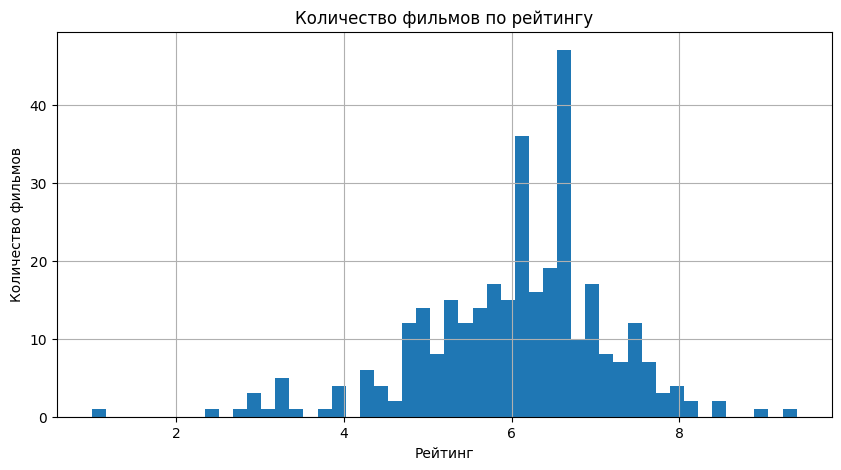

In [66]:
data_support_ratings_plot = data_support['ratings'].plot(bins=50, kind='hist', figsize=(10, 5), grid=True)

data_support_ratings_plot.set_title('Количество фильмов по рейтингу')
data_support_ratings_plot.set_xlabel('Рейтинг')
data_support_ratings_plot.set_ylabel('Количество фильмов')

plt.show()

Больше всего фильмов имеют рейтинг от 5 до 7. В целом, это вполне нормальный рейтинг для фильма, вне зависимости от того, финансирует его государство или нет.

Проанализируем рейтинг, вычислим среднее и медиану

In [67]:
mean_rating = data_support['ratings'].mean()
median_rating = data_support['ratings'].median()
print(f"Средний рейтинг: {mean_rating}")
print(f"Медианный рейтинг: {median_rating}")

Средний рейтинг: 6.046808510638298
Медианный рейтинг: 6.2


Как мы видим, они очень похожи, значит выборка распределена более и менее равномерно.

Далее проверим окупаемость фильма. Что мы считаем окупившимся фильмом? Будем считать, что фильм окупился, если `box_office` больше, чем `budget`. Безусловно, стоит еще учитывать затраты на дистрибьюцию, рекламу и т.д., но обойдемся без этого и будем смотреть именно на цифры.

Напишем код, который посчитает долю окупившихся фильмов

In [70]:
data_support.loc[:, 'is_payback'] = data_support['box_office'] > data_support['budget']
payback_ratio = (data_support['is_payback'].sum() / len(data_support)) * 100
print(f"Доля окупившихся фильмов: {payback_ratio} %")

Доля окупившихся фильмов: 25.227963525835868 %


Из всех фильмов, которые профинансировало государство, окупились только 25%. Что, конечно, не самый хороший результат.

Что можно сказать, исходя из изученных данных? Рейтинг у фильмов с гос.поддержкой достаточно посредственный (не очень высокий), и внушительная часть фильмов не окупилась в прокате. Но это и не удивительно - обычно создатели такого кино и не ставят цели окупиться.

###### Вычислим окупаемость по типам фильмов

In [78]:
payback_by_type_mean = data_support.groupby('type')['is_payback'].mean() * 100
payback_by_type_sum = data_support.groupby('type')['is_payback'].sum()
print("\nОкупаемость по типам фильмов (%):")
print(payback_by_type_mean)
print("\nВсего фильмов:")
print(payback_by_type_sum)


Окупаемость по типам фильмов (%):
type
Анимационный     45
Документальный    0
Художественный   23
Name: is_payback, dtype: float64

Всего фильмов:
type
Анимационный      14
Документальный     0
Художественный    69
Name: is_payback, dtype: int64


Анализ окупаемости фильмов с государственной поддержкой показывает:
- **Анимационные фильмы**: 45% окупились (14 фильмов), что делает их наиболее успешными благодаря широкой семейной аудитории и потенциалу для повторных показов.
- **Художественные фильмы**: 23% окупились (69 фильмов), демонстрируя умеренную эффективность. Большое количество таких фильмов включает как коммерческие, так и некоммерческие проекты.
- **Документальные фильмы**: 0% окупились, что ожидаемо, так как они ориентированы на культурные и образовательные цели, а не на кассовые сборы.

Анимация — наиболее перспективное направление для господдержки, требующее дальнейших инвестиций. Художественные фильмы имеют потенциал, но их эффективность варьируется. Документальные проекты нуждаются в пересмотре подхода к финансированию, возможно, с акцентом на маркетинг или альтернативные каналы дистрибуции.

Как мы видим, больше всего окупились анимационные фильмы. Скорее всего это связано с широкой детской аудиторией и потенциалом для повторных показов.

In [74]:
budget_by_genre = data_support.groupby('main_genre')['budget'].mean() / 1_000_000
print("\nСредний бюджет по жанрам (млн руб.):")
print(budget_by_genre)


Средний бюджет по жанрам (млн руб.):
main_genre
биография     176
боевик        101
военный       143
детектив      240
детский        46
драма         119
история       536
комедия        80
криминал      142
мелодрама      61
мультфильм    170
мюзикл        141
приключения   482
реальное ТВ    80
семейный       91
спорт         237
триллер        86
ужасы          56
фантастика    125
фэнтези       229
Name: budget, dtype: float64


Анализ бюджетов фильмов с господдержкой показывает приоритет на зрелищные жанры (история — 536 млн руб., приключения — 482 млн руб.) и умеренное финансирование социально значимых (драма — 119 млн руб., биография — 176 млн руб.). Мультфильмы (170 млн руб.) перспективны из-за высокой окупаемости. Низкобюджетные жанры (комедия — 80 млн руб., ужасы — 56 млн руб.) недооценены. Рекомендуется усилить поддержку мультфильмов, оптимизировать затраты на дорогие жанры и продвигать массовые проекты для повышения эффективности.

##### Сколько средств выделяют на поддержку фильмов?

Посмотрим, сколько денег из бюджета выделялось на фильмы по годам:

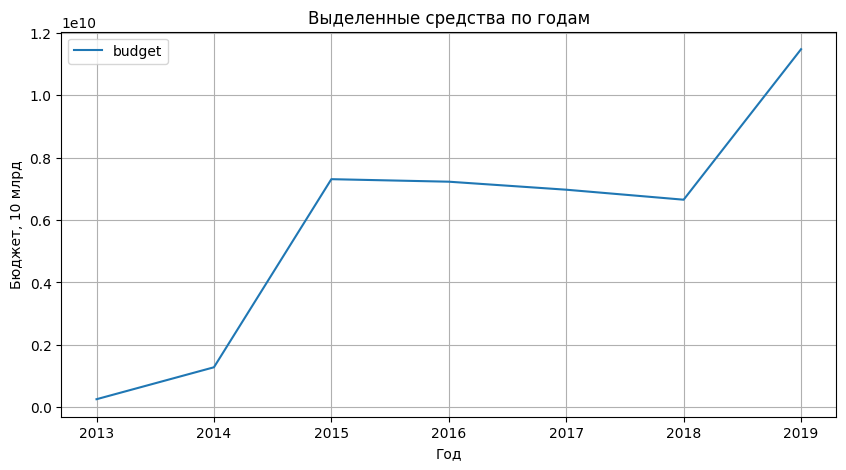

,budget
year_of_show,
2013,255435390
2014,1279484783
2015,7309669207
2016,7228942748
2017,6972172568
2018,6651694634
2019,11475866609


In [79]:
data_support_budget = data_support.pivot_table(index='year_of_show', values='budget', aggfunc='sum')

data_support_budget_plot = data_support_budget.plot(kind='line', figsize=(10, 5), grid=True)
data_support_budget_plot.set_title('Выделенные средства по годам')
data_support_budget_plot.set_xlabel('Год')
data_support_budget_plot.set_ylabel('Бюджет, 10 млрд')

plt.show()

Объем выделяемых бюджетных средств (почти) неуклонно растет. Это легко объяснить - фильмом снимается больше с каждым годом. Соответственно, и финансировать приходится бОльшие объемы.

##### Возрастные ограничения

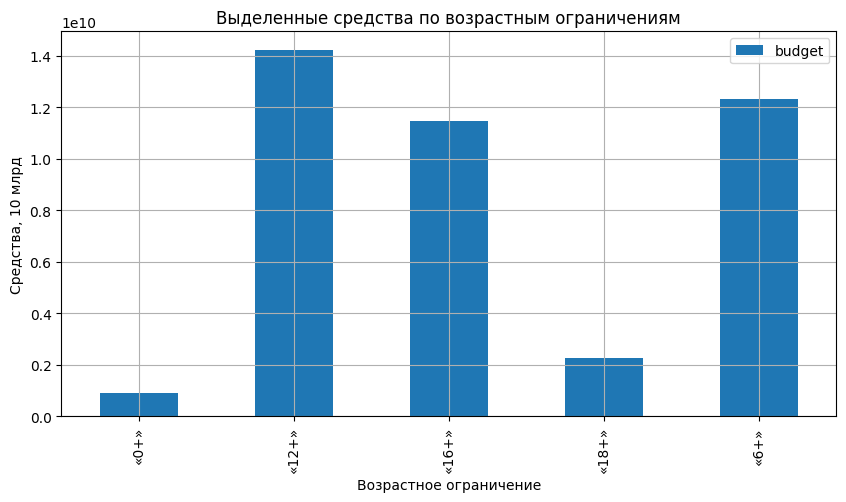

,budget
age_restriction,
«0+»,902984585
«12+»,14232946009
«16+»,11465591936
«18+»,2250837155
«6+»,12320906254


In [80]:
data_support_age = data_support.pivot_table(index='age_restriction', values='budget', aggfunc='sum')

data_support_age_plot = data_support_age.plot(kind='bar', figsize=(10, 5), grid=True)
data_support_age_plot.set_title('Выделенные средства по возрастным ограничениям')
data_support_age_plot.set_xlabel('Возрастное ограничение')
data_support_age_plot.set_ylabel('Средства')

plt.show()

Больше всего средств выделено на фильмы с ограничением 12+ - более 14 миллиардов. Приблизительно одинаковый объем был выделен на фильмы 6+ и 16+ - порядка 12 млрд.

Исходя из этих данных, можно сделать вывод о том, что государство заинтересовано в создании фильмов для несовершеннолетней аудитории. Вероятно, такие фильмы наиболее востребованы, ведь аудитория у них очень обширна.

Анализ фильмов, получивших государственную поддержку (327 фильмов), выявил ключевые характеристики их финансирования, окупаемости и рейтингов:

Объём финансирования: Общий бюджет составляет 3.65 млрд руб., с устойчивым ростом по годам (пик в 2019 году). Наибольшие средства выделяются на фильмы с возрастным ограничением 12+ (14 млрд руб.), 6+ и 16+ (12 млрд руб. каждая), что подчёркивает фокус на молодёжную и семейную аудиторию.
Рейтинги: Средний рейтинг — 6.05, медиана — 6.2, с большинством фильмов в диапазоне 5–7. Это указывает на средний уровень восприятия зрителями, типичный для проектов с культурной или социальной направленностью.
Окупаемость: Лишь 25.23% фильмов окупились (сборы превышают бюджет). По типам фильмов:

Анимационные: 45% окупились (14 фильмов), благодаря широкой детской аудитории.
Художественные: 23% окупились (69 фильмов), с умеренной эффективностью из-за разнообразия жанров.
Документальные: 0% окупились, что ожидаемо для некоммерческих проектов.


Бюджеты по жанрам: Наиболее затратные жанры — история (536 млн руб.) и приключения (482 млн руб.), требующие сложного производства. Мультфильмы (170 млн руб.) и драмы (119 млн руб.) получают умеренное финансирование, а комедии (80 млн руб.) и ужасы (56 млн руб.) — минимальное, несмотря на их потенциал.

Промежуточный вывод: Господдержка ориентирована на молодёжную аудиторию (12+, 6+, 16+) и социально значимые проекты, но окупаемость остаётся низкой (25%). Анимация выделяется как наиболее перспективное направление благодаря высокой окупаемости. Для повышения эффективности рекомендуется увеличить поддержку мультфильмов, оптимизировать бюджеты для дорогих жанров (история, приключения) и усилить маркетинг для массовых жанров (комедия, ужасы), чтобы повысить сборы и рентабельность.

### Шаг 5. Напишите общий вывод


### Общая динамика кинопроката
Российский кинопрокат демонстрирует устойчивый рост с 2010 по 2019 год. Пик количества фильмов зафиксирован в 2019 году (930 фильмов), минимум — в 2010 году (100). Наиболее полные данные о сборах приходятся на 2015–2017 годы (60–70% фильмов с данными), с максимумом в 2016 году. Суммы сборов достигли пика в 2017 году (48.7 млрд руб.), минимума — в 2014 году (7.2 млрд руб.). Фильмы для подростков (16+) лидируют по сборам (68 млрд руб. за 2015–2019), что подчёркивает их значимость для рынка.

### Государственная поддержка кино
Государство выделило 3.65 млрд руб. на поддержку 327 фильмов, с акцентом на аудиторию 12+ (14 млрд руб.), 6+ и 16+ (12 млрд руб. каждая). Средний рейтинг таких фильмов — 6.05, медиана — 6.2, что отражает среднее восприятие зрителями. Окупаемость составляет всего 25% (82 фильма), что указывает на приоритет культурных и социальных целей над коммерческими. Анимационные фильмы показывают наивысшую окупаемость (45%), художественные — умеренную (23%), документальные — нулевую.

### Типы фильмов и их окупаемость
Анимационные фильмы (170 млн руб. средний бюджет) наиболее успешны благодаря широкой семейной аудитории и потенциалу повторных показов. Художественные фильмы (119 млн руб.) имеют умеренную эффективность, тогда как документальные не окупаются, ориентируясь на культурные цели. Зрелищные жанры (история — 536 млн руб., приключения — 482 млн руб.) получают наибольшее финансирование, но низкобюджетные жанры (комедия — 80 млн руб., ужасы — 56 млн руб.) недооценены, несмотря на потенциал.

### Заключение
Российский кинопрокат активно развивается, с ростом числа фильмов и сборов, особенно для подростковой аудитории (16+). Господдержка играет ключевую роль в создании культурно значимого контента, но требует оптимизации для повышения коммерческой отдачи. Анимация выделяется как наиболее перспективное направление, тогда как документальные фильмы нуждаются в новых подходах к дистрибуции.

### Общие выводы
- **Рост кинопроката**: Увеличение числа фильмов и сборов, особенно в 2015–2019 годах, свидетельствует о растущем интересе аудитории и потенциале рынка.
- **Ключевая аудитория**: Фильмы 16+ приносят наибольшие сборы (~68 млрд руб.), что делает подростков приоритетной аудиторией.
- **Эффективность господдержки**: Только 25% фильмов окупаются, с анимацией как лидером (45%). Зрелищные жанры требуют оптимизации, а низкобюджетные жанры — большего внимания.

### Рекомендации
1. **Фокус на подростковую аудиторию**: Усилить маркетинг фильмов 16+ через социальные сети и таргетированные кампании для повышения сборов.
2. **Инвестиции в анимацию**: Увеличить финансирование мультфильмов, учитывая их высокую окупаемость и популярность.
3. **Оптимизация зрелищных жанров**: Ввести мониторинг ROI для исторических и приключенческих фильмов, чтобы повысить эффективность затрат.
4. **Развитие документального кино**: Использовать онлайн-платформы и субсидии на продвижение для увеличения доступности и охвата.
5. **Улучшение данных**: Обеспечить полноту данных о сборах и рейтингах для более точного анализа и планирования.
6. **Поддержка массовых жанров**: Увеличить финансирование комедий и ужастиков для роста коммерческого потенциала.

В заключение, данные и анализ показывают, что кинопрокат в России имеет большой потенциал для дальнейшего развития. Особое внимание следует уделить аудитории подростков, расширению государственной поддержки кинопроектов с высоким культурным и образовательным потенциалом, а также инвестициям в анимационные фильмы.